<a href="https://colab.research.google.com/github/Ab-HIN-AV/Task-2--Handwritten-Rec/blob/main/Task_2_Handritten_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HandWritten Clasification

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
type(x_train)

numpy.ndarray

In [13]:
# shape of the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test Data = 10,000 Images

Image Dimensions -->28*28

Grayscale Image --> 1 channel

In [14]:
# printing the 10th image

print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [15]:
print(x_train[10].shape)

(28, 28)


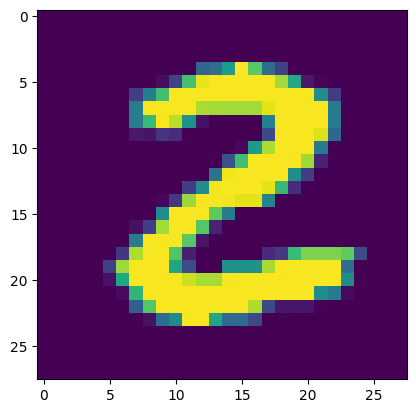

2


In [17]:
# displaying the image

plt.imshow(x_train[25])
plt.show()

# print the corresponding label
print(y_train[25])

Image Lables

In [18]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [19]:
# unique value in y_train
print(np.unique(y_train))

# unique value in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


we can use these lables as such or we can also apply one hot encoding

All the images have same dimensions in this dataset,if not we have to resize the images to a commom dimensions

In [20]:
# scaling the values

x_train = x_train/255
x_test = x_test/255

In [22]:
# print the 10th image

print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

building the neural network

In [24]:
# setting up the layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),])

In [25]:
# compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# training the neural network

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3081 - accuracy: 0.9098
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1401 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1031 - accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0687 - accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0584 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0509 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0448 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0389 - accuracy: 0.9873
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.034

training data accuracy = 98.9%

Accuracy on Test Data

In [27]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9702
0.9702000021934509


Test Data Accuracy = 97.1%

In [28]:
print(x_test.shape)

(10000, 28, 28)


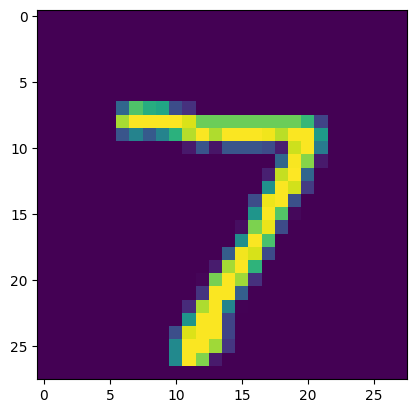

In [29]:
# first data point in x_test
plt.imshow(x_test[0])
plt.show()

In [30]:
print(y_test[0])

7


In [ ]:
y_pred = model.predict(x_test)

In [32]:
print(y_pred.shape)

(10000, 10)


In [33]:
print(y_pred[0])

[1.2327275e-04 7.7646735e-05 4.5364331e-02 9.9406403e-01 6.5901209e-09
 1.2989850e-01 4.1154389e-11 9.9999380e-01 1.2892481e-02 5.2244955e-01]


model.predict() gives the prediction probability of each class for that data point

In [34]:
# converting the prediction probability to class label

label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [35]:
# converting the prediction probability to class label for all test data points

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

t_pred_labels --> predicted labels

confusion matrix

In [38]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [39]:
print(conf_mat)

tf.Tensor(
[[ 967    0    1    3    0    3    2    0    2    2]
 [   0 1121    3    1    0    0    1    0    9    0]
 [   3    2 1000    4    1    0    2    5   13    2]
 [   0    0    4  975    0   17    0    4    7    3]
 [   1    1    6    0  941    2    1    5    3   22]
 [   3    0    0    4    0  878    1    0    5    1]
 [   8    2    0    1    7   16  916    0    7    1]
 [   1    3   11    5    0    0    0  989    9   10]
 [   3    0    3    7    3   14    0    3  938    3]
 [   1    2    0    7    5    8    1    2    6  977]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'predicted labels')

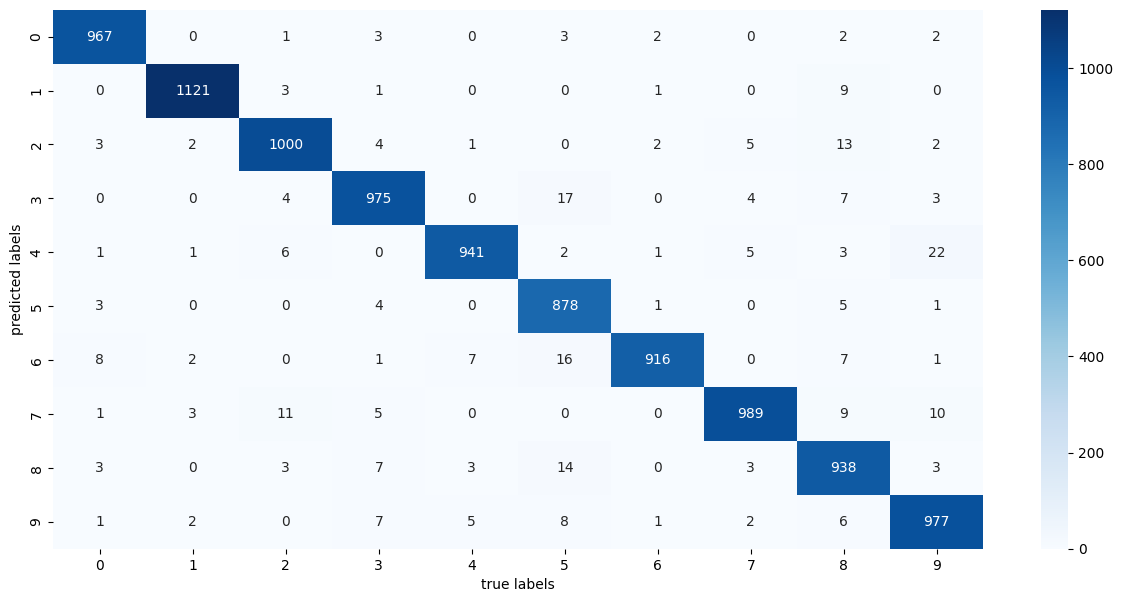

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('true labels')
plt.ylabel('predicted labels')

building the predictive system

In [41]:
input_image_path = '/content/MNIST_digit.png'
input_image = cv2.imread(input_image_path)

In [42]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

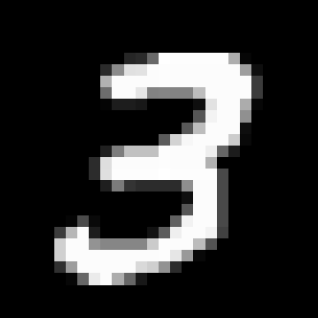

In [44]:
cv2_imshow(input_image)

In [45]:
input_image.shape

(318, 318, 3)

In [46]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [47]:
grayscale.shape

(318, 318)

In [48]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [49]:
input_image_resize.shape

(28, 28)

In [50]:
cv2_imshow(input_image_resize)

In [51]:
input_image_resize = input_image_resize/255

In [52]:
image_reshaped = np.reshape(input_image_resize, (1,28,28))

In [53]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 40ms/step
[[7.4904086e-13 4.1728881e-06 1.3933070e-04 1.0000000e+00 2.1097677e-12
  5.0598150e-01 5.8543170e-19 9.7569847e-04 1.6956446e-01 6.1553365e-01]]


In [54]:
input_pred_label = np.argmax(input_prediction)

In [56]:
print(input_pred_label)

3


PREDICTIVE SYSTEM

path of the image to be predicted:/content/MNIST_digit.png


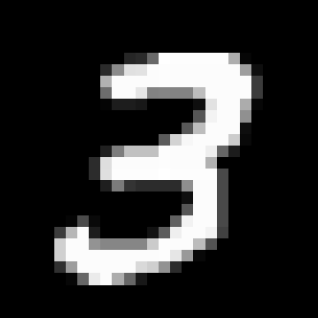

1/1 [==============================] - 0s 38ms/step
The Handwritten Digit is recognised as  3


In [58]:
input_image_path = input('path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, (1,28,28))

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)
